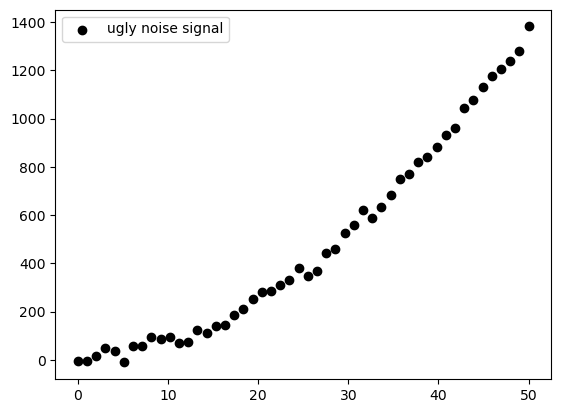

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0, 50, 50)
y=0.5*x**2+2*x+10+np.random.normal(0,20,50)
plt.scatter(x, y, color='black', label='ugly noise signal')
plt.legend()
plt.show()

In [4]:
X = np.stack((x**2, x, np.ones(50)), axis=1)
#print(X)
X_transpose = X.transpose()
parenthesis = X_transpose.dot(X)
inverse_matrix = np.linalg.inv(parenthesis)
b = inverse_matrix.dot(X_transpose).dot(y)
print(b)

[0.51005934 1.78061386 1.55602297]


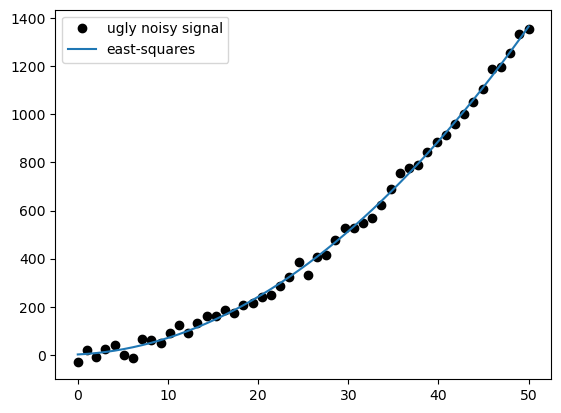

In [6]:
fig2, ax2 = plt.subplots()
ax2.plot(x, y, 'ko', label='ugly noisy signal')
ax2.plot(x, b[0]*x**2+b[1]*x+b[2], label= 'east-squares')
ax2.legend()

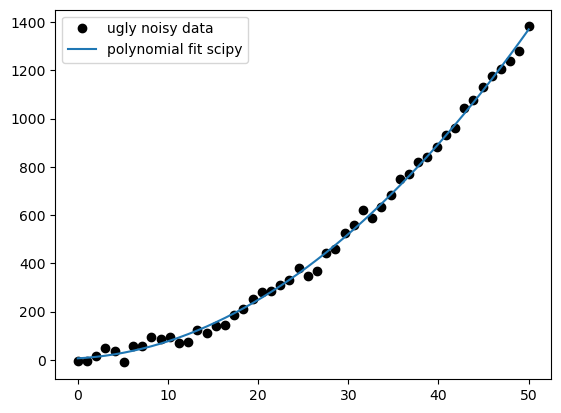

In [5]:
from scipy.optimize import curve_fit

def polynomial_2(x, a, b, c):
    return a*x**2+b*x+c

popt, pcov = curve_fit(polynomial_2, x, y)
fig3, ax3 = plt.subplots()
ax3.plot(x, y, 'ko', label='ugly noisy data')
ax3.plot(x, polynomial_2(x, *popt), label='polynomial fit scipy')
ax3.legend()


In [6]:
import pandas as pd
import numpy as np
data_frame = pd.read_csv('Users/apixwkevin/Downloads/alumina_data_raw.txt',sep=';', dtype=np.float64,na_values='null')
data_frame.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Users/apixwkevin/Downloads/alumina_data_raw.txt'

In [23]:
def calculate(op, x, y):
    if op =="add":
        return x + y
    elif op == "subtract":
        return x - y
    elif op == "multiply":
        return x * y
    elif op == "divide":
        return x / y if y != 0 else float("inf")
    else:
        raise ValueError("Unknown operation")
print(calculate("multiply", 4, 5))


20


In [29]:
import os
import numpy as np
UI_N = 50
folder = 'Users/apixwkevin/Downloads/TR_PIV_JET'
Isdir = os.listdir(f'./{folder}/')
print(Isdir)

nfiles = len(Isdir)
filename = f"{folder}/{Isdir[UI_N]}"
print(f'The file being processed is : {filename}')

['Res00107.dat', 'Res00113.dat', 'Res00098.dat', 'Res00073.dat', 'Res00067.dat', 'Res00066.dat', 'Res00072.dat', 'Res00099.dat', 'Res00112.dat', 'Res00106.dat', 'Res00138.dat', 'Res00110.dat', 'Res00104.dat', 'Res00058.dat', 'Res00064.dat', 'Res00070.dat', 'Res00071.dat', 'Res00065.dat', 'Res00059.dat', 'Res00105.dat', 'Res00111.dat', 'Res00139.dat', 'Res00115.dat', 'Res00101.dat', 'Res00129.dat', 'Res00061.dat', 'Res00075.dat', 'Res00049.dat', 'Res00048.dat', 'Res00074.dat', 'Res00060.dat', 'Res00128.dat', 'Res00100.dat', 'Res00114.dat', 'Res00102.dat', 'Res00116.dat', 'Res00089.dat', 'Res00076.dat', 'Res00062.dat', 'Res00063.dat', 'Res00077.dat', 'Res00088.dat', 'Res00117.dat', 'Res00103.dat', 'Res00158.dat', 'Res00164.dat', 'Res00170.dat', 'Res00038.dat', 'Res00010.dat', 'Res00004.dat', 'Res00005.dat', 'Res00011.dat', 'Res00039.dat', 'Res00171.dat', 'Res00165.dat', 'Res00159.dat', 'Res00198.dat', 'Res00173.dat', 'Res00167.dat', 'Res00007.dat', 'Res00013.dat', 'Res00012.dat', 'Res000

In [30]:
it_data = np.loadtxt(filename, skiprows=1)
print(f'The shape of the data is: {it_data.shape}')

The shape of the data is: (6840, 4)


In [31]:
x_unique = np.unique(it_data[:, 0])
y_unique = np.unique(it_data[:, 1])
nx, ny = len(x_unique), len(y_unique)
print(f'The number of grid point is x={nx}, and y={ny}')
U = it_data[:, 2].reshape((nx,ny)).T
V= -it_data[:, 3].reshape((nx,ny)).T
xg, yg = np.meshgrid(x_unique, y_unique)
Umag = np.sqrt(U**2 + V**2)

print(f'The shape of the grid is : {xg.shape}')
print(f'The shape of Umag is: {Umag.shape}')
Umag[5,5]

The number of grid point is x=114, and y=60
The shape of the grid is : (60, 114)
The shape of Umag is: (60, 114)


7.66007545654741

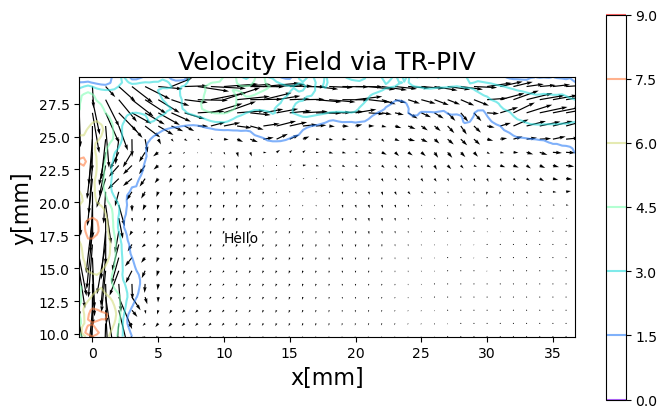

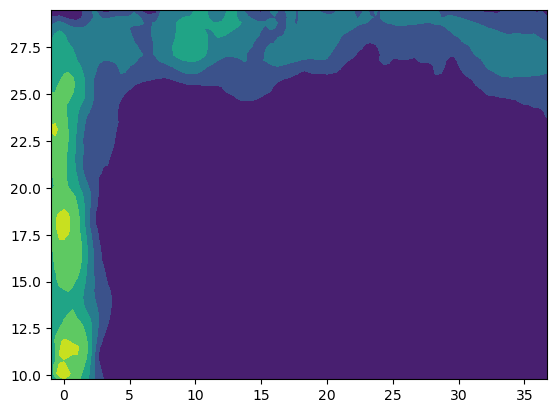

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.contourf(xg,yg,Umag)
plt.show()

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
p = ax.contour(xg,yg,Umag, alpha=0.6, cmap='rainbow')
fig.colorbar(p)
stepx = 3
stepy = 3
ax.quiver(xg[::stepx,::stepy],yg[::stepx,::stepy],U[::stepx,::stepy],V[::stepx,::stepy],color='k')
ax.annotate('Hello',(10,17))
ax.set_aspect('equal')
ax.set_xlabel('x[mm]',fontsize=16)
ax.set_ylabel('y[mm]',fontsize=16)
ax.set_title('Velocity Field via TR-PIV',fontsize=18)

Text(0.5, 1.0, 'Velocity Field via TR-PIV')

In [45]:
class GameCharacter:
    def __init__(self, side, hp, weapon):
        self.side=side
        self.max_hp=hp
        self.current_hp=hp
        self.weapon=weapon
        self.items =[]
        
    def pickup_item(self, item):
        print('Item{item} collected')
        self.items.append(item)
    def heal(self):
        if 'potion' in self.items and self.current_hp<self.max_hp:
            self.current_hp =min(self.current_hp+10, self.max_hp)
            self.items.remove('potion')
            print('Character healed')
        else:
            print('Potion not used...')

wizard = GameCharacter('ally', hp=10_000, weapon = 'stick')

wizard.pickup_item('potion')
wizard.pickup_item('apple')

Item{item} collected
Item{item} collected


In [2]:
class Car:
    def __init__(self, n_wheels, engine_type, max_speed, n_seats):
        self.n_wheels=n_wheels
        self.engine_type=engine_type
        self.max_speed=max_speed
        self.n_seats=n_seats
        
    def make_noise(self):
        if self.engine_type == 'EV':
            print('okay')
    
class Person:
    def __init__(self, name, hp, location, car=None):
        self.hp=hp
        self.name=name
        self.location=location
        self.car=car

    def enter_car(self, car=None):
       if car:
            self.car = car
            print(f'{self.name} entered the car!')
        elif self.car:
            print(f'{self.name} is getting in their car!')
        else:
            print(f'{self.name} has no car to enter!')
Cadillac = Car(n_wheels=4, engine_type= 'EV', max_speed= 200, n_seats = 4)
Zoey = Person('Zoey', hp=100, location='NMSU')
Cadillac.make_noise()
Zoey.enter_car()

IndentationError: unindent does not match any outer indentation level (<string>, line 23)

Workshop day 2

In [6]:
import numpy as np

data = np.array([2, 4, 6, 8, 10, 1])
mask = (data >5) & (data < 10)
print(mask)
filtered  = data[mask]
print(filtered) 

[False False  True  True False False]
[6 8]


In [13]:
import random
import time
import functools

def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Function {func.__name__} took {execution_time:.4f} seconds to execute")
        return result
    return wrapper

@timer 
def montecarlo(n):
    in_circle = 0
    for i in range (n):
        x = random.random()
        y = random.random()
        if (x**2+y**2) <= 1:
            in_circle += 1
    print((in_circle/n)*4)

n=1000000
montecarlo(n)

3.14208
Function montecarlo took 0.1534 seconds to execute


In [12]:
n = int(6e6)
import math
@timer
def with_loops():
    xs = range(n)
    ys = [math.sin(x)+x**2 for x in xs]

with_loops()

Function with_loops took 0.5479 seconds to execute


In [ ]:
@timer
@njit
def estimate_pi_numba(num_points):
    points_inside _circle = 0
    for _ in range(num_points):
        x = random.uniform

In [14]:
import streamlit as st 

st.title("Hello, Streamlit!")

2025-06-17 11:29:12.733 
  command:

    streamlit run /opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()